In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import math
import seaborn as sns

In [206]:
winnipegData = pd.read_csv("C:/Users/dunca/OneDrive/Desktop/School/4th_Year/351/CMPE351/data/Winnipeg/listings.csv")
quebecCityData = pd.read_csv("C:/Users/dunca/OneDrive/Desktop/School/4th_Year/351/CMPE351/data/Quebec_City/listings.csv")
winnipegData['price'].head()

0     $82.00
1     $35.00
2     $63.00
3     $90.00
4    $200.00
Name: price, dtype: object

In [207]:
winnipegData['price'] = winnipegData['price'].str.replace('$', '').str.replace(',', '').astype(float)
quebecCityData['price'] = quebecCityData['price'].str.replace('$', '').str.replace(',', '').astype(float)
columns_tf = ['host_has_profile_pic', 'host_identity_verified', 'has_availability', "instant_bookable"]  # Add more columns as needed
winnipegData[columns_tf] = winnipegData[columns_tf].replace({'t': 1, 'f': 0, '': 0})
quebecCityData[columns_tf] = quebecCityData[columns_tf].replace({'t': 1, 'f': 0, '':0})

C:\Users\dunca\AppData\Local\Temp/ipykernel_4012/4010288803.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  winnipegData['price'] = winnipegData['price'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\dunca\AppData\Local\Temp/ipykernel_4012/4010288803.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  quebecCityData['price'] = quebecCityData['price'].str.replace('$', '').str.replace(',', '').astype(float)


# Data Exploration

Number of Unique Winnipeg Hosts:  992
Number of Entries Winnipeg:  1892
Average Entries per Winnipeg Host:  1.907258064516129
Number of Unique Quebec City Hosts:  1091
Number of Entries Quebec City:  2213
Average Entries per Quebec City Host:  2.028414298808433


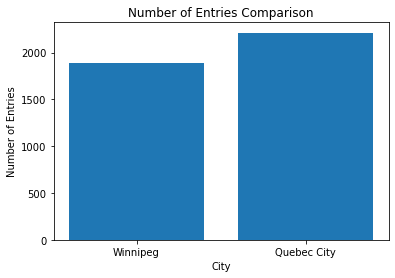

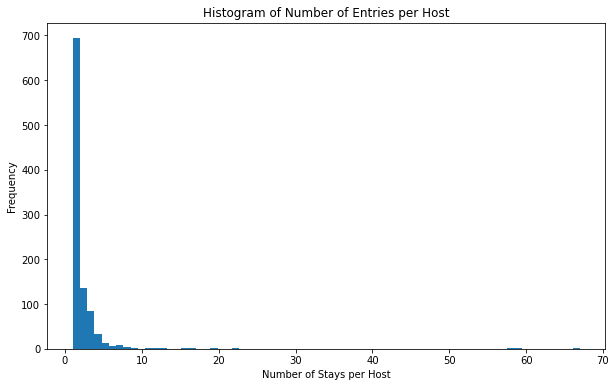

In [208]:
print("Number of Unique Winnipeg Hosts: ", winnipegData['host_id'].nunique())
print("Number of Entries Winnipeg: ", len(winnipegData))
print("Average Entries per Winnipeg Host: ", len(winnipegData)/winnipegData['host_id'].nunique())
print("Number of Unique Quebec City Hosts: ", quebecCityData['host_id'].nunique())
print("Number of Entries Quebec City: ", len(quebecCityData))
print("Average Entries per Quebec City Host: ", len(quebecCityData)/quebecCityData['host_id'].nunique())

plt.bar(['Winnipeg', 'Quebec City'], [len(winnipegData), len(quebecCityData)])
plt.title('Number of Entries Comparison')
plt.xlabel('City')
plt.ylabel('Number of Entries')
plt.show()

# Histogram of number of stays per host_id
entries_per_host = winnipegData.groupby('host_id').size()

plt.figure(figsize=(10, 6))
plt.hist(entries_per_host, bins=70)
plt.title('Histogram of Number of Entries per Host')
plt.xlabel('Number of Stays per Host')
plt.ylabel('Frequency')
plt.show()


In [209]:
# Count the number of occurrences of each host_id
host_id_counts = winnipegData['host_id'].value_counts()

# # Display the top 5 percent
top_5p_entries = math.floor(winnipegData['host_id'].nunique()*0.05)  # Take top 10 percent as these hosts have 3+ entries
top_5p_entries = host_id_counts.head(top_5p_entries).index.tolist() # retrieve top hosts index
filtered_data = winnipegData[winnipegData['host_id'].isin(top_5p_entries)].copy() # copy information

Correlation Matrix between the Top Hosts:


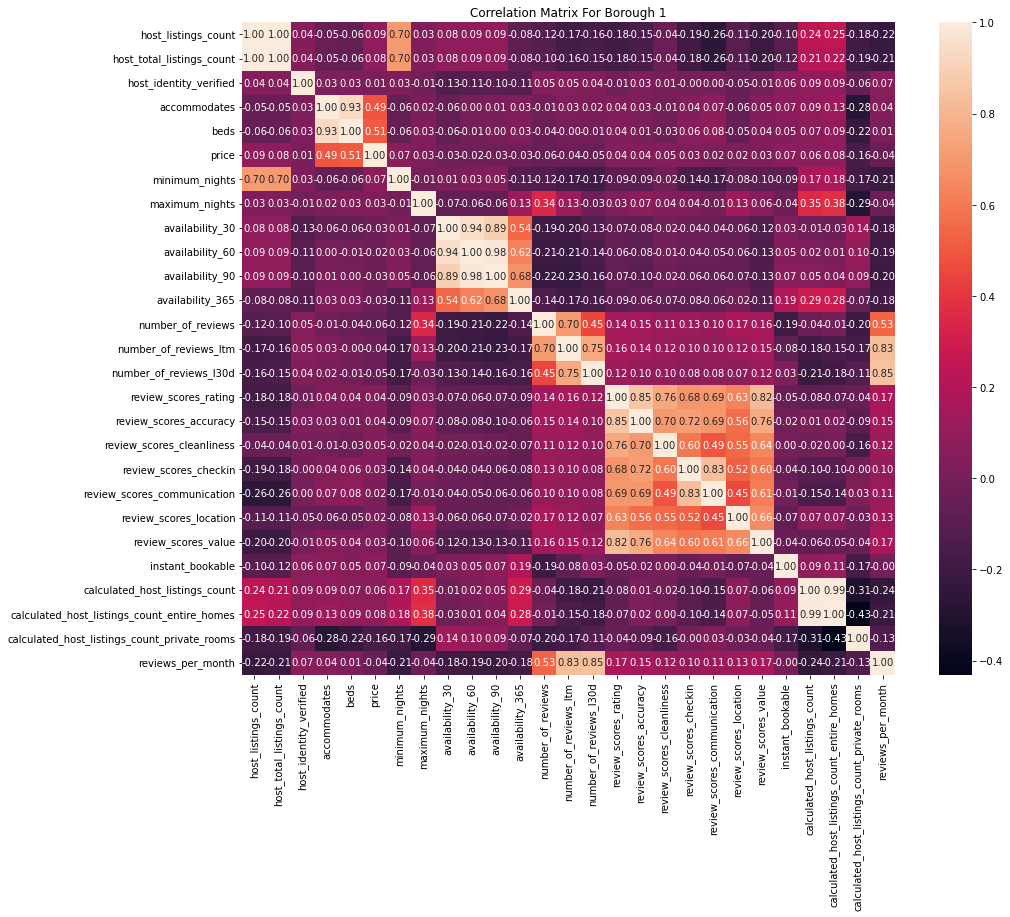

In [210]:
filtered_data.drop(columns=["id", "last_scraped", "name", "host_id", "host_name", "host_about", "host_neighbourhood", 
                            "scrape_id", "description", "neighborhood_overview", "minimum_minimum_nights", "maximum_minimum_nights",
                            "host_verifications", "neighbourhood", "neighbourhood_cleansed", "minimum_maximum_nights", "minimum_nights_avg_ntm",
                            "neighbourhood_group_cleansed", "amenities", "latitude", "longitude", "maximum_maximum_nights", "calendar_updated",
                           "bathrooms", "bedrooms", "license", "calculated_host_listings_count_shared_rooms", "maximum_nights_avg_ntm",
                           "host_has_profile_pic", "has_availability"], inplace=True)
numeric_columns = filtered_data.select_dtypes(include=['int64', 'float64'])
# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print("Correlation Matrix between the Top Hosts:")
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True)
plt.title('Correlation Matrix For Borough 1')
plt.show()